In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
def plot_professional_pie(data, title):
    plt.figure(figsize=(10, 7))
    
    # We don't put labels on the pie itself to avoid overlap
    # 'pctdistance' moves the % numbers slightly outward or inward
    wedges, texts, autotexts = plt.pie(
        data, 
        autopct='%1.1f%%', 
        startangle=140, 
        pctdistance=0.85, 
        colors=sns.color_palette("viridis", len(data))
    )
    
    # Make the % numbers white/bold for readability
    plt.setp(autotexts, size=10, weight="bold", color="white")
    
    # ADD THE KEY (Legend)
    # This puts the legend to the right of the chart
    plt.legend(
        wedges, 
        data.index, 
        title="Categories", 
        loc="center left", 
        bbox_to_anchor=(1, 0, 0.5, 1)
    )
    
    plt.title(title, pad=20)
    plt.show()

# Example usage:
# plot_professional_pie(pricing_counts, "Contract Pricing Distribution")

In [21]:
# 1. THE FONT: We use 'serif' to get that formal LaTeX look. 
# 'STIXGeneral' is a common font that looks nearly identical to Computer Modern (LaTeX).
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['STIXGeneral', 'Times New Roman', 'DejaVu Serif']

# 2. THE SIZES: title (big), axes labels (medium), tick labels (small)
plt.rcParams['axes.titlesize'] = 22          # Big Title
plt.rcParams['axes.titleweight'] = 'bold'    # Bold Title
plt.rcParams['axes.labelsize'] = 18          # Medium Axis Labels (X and Y)
plt.rcParams['axes.labelweight'] = 'bold'    # Bold Axis Labels
plt.rcParams['xtick.labelsize'] = 11         # Small Grid Labels
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['legend.fontsize'] = 11

# 3. THE GRID: Light, thin, and gray so it doesn't distract
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3       # Transparency
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 0.5

# 4. GENERAL LOOK: Black text and professional axes
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'

In [22]:
# 1. LOAD DATA
# low_memory=False prevents warnings about mixed data types in large files
file_name = 'Contracts_PrimeAwardSummaries_2026-01-21.csv' 
df = pd.read_csv(file_name, low_memory=False)

In [23]:
# 2. SELECT THE ESSENTIAL 15
# We filter early to save your computer's memory
important_cols = [
    'award_id_piid', 'recipient_name', 'total_obligated_amount', 
    'potential_total_value_of_award', 'period_of_performance_start_date',
    'awarding_sub_agency_name', 'naics_description', 'type_of_contract_pricing',
    'extent_competed', 'type_of_set_aside', 'number_of_offers_received',
    'primary_place_of_performance_state_name', 'prime_award_base_transaction_description',
    'award_type', 'usaspending_permalink'
]
df = df[important_cols].copy()

In [24]:
# 3. CLEANING DATA
# Convert dates to actual "Date" format so Python can sort them
df['period_of_performance_start_date'] = pd.to_datetime(df['period_of_performance_start_date'], errors='coerce')
# Fill empty names just in case
df['recipient_name'] = df['recipient_name'].fillna('UNKNOWN RECIPIENT')


--- TOP 10 RECIPIENTS BY DOLLARS ---
recipient_name
MASSACHUSETTS INSTITUTE OF TECHNOLOGY     $11,130,836,480.97
RAYTHEON COMPANY                           $6,643,973,979.05
THE MITRE CORPORATION                      $4,607,696,532.62
ODYSSEY SYSTEMS CONSULTING GROUP, LTD.     $1,366,066,150.78
OASIS SYSTEMS, LLC                           $747,954,098.21
SUMARIA SYSTEMS, LLC                         $643,887,288.10
GOODRICH CORPORATION                         $616,353,383.86
SYSTEMS & TECHNOLOGY RESEARCH LLC            $269,766,504.00
BOOZ ALLEN HAMILTON INC                      $143,647,702.09
RTX BBN TECHNOLOGIES, INC.                   $108,072,555.00
Name: total_obligated_amount, dtype: object


C:\Users\pkpal\AppData\Local\Temp\ipykernel_33720\2083110092.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


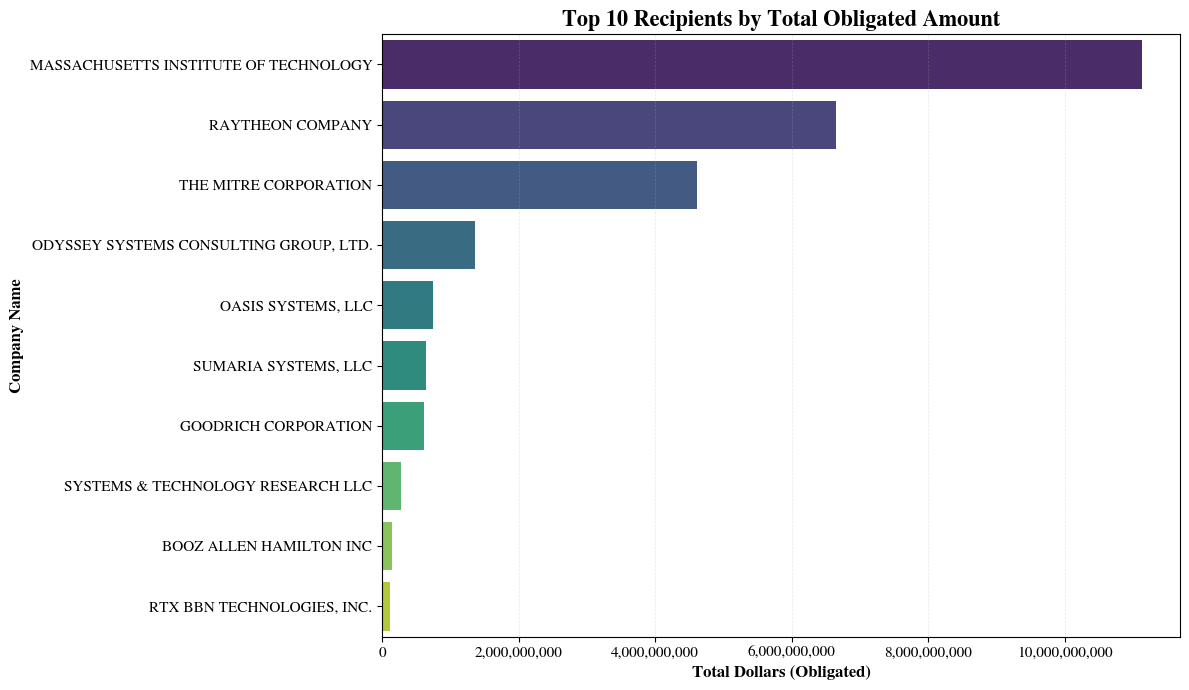

In [25]:
# --- ANALYSIS 1: RECIPIENTS & DOLLARS (Updated) ---

# 1. Group by recipient and sum their money
recipient_spending = df.groupby('recipient_name')['total_obligated_amount'].sum().sort_values(ascending=False)

# 2. Get the Top 10 for the graph
top_10_spending = recipient_spending.head(10)

print("--- TOP 10 RECIPIENTS BY DOLLARS ---")
print(top_10_spending.map('${:,.2f}'.format))

# --- VISUALIZATION 1: Top 10 Recipients (Horizontal & Colored) ---
plt.figure(figsize=(12, 7))

# We use Seaborn (sns) for the colors and horizontal layout
# x = the money (numeric)
# y = the names (categorical)
sns.barplot(
    x=top_10_spending.values, 
    y=top_10_spending.index, 
    palette="viridis"  # You can also try "magma", "rocket", or "mako"
)

plt.title('Top 10 Recipients by Total Obligated Amount', fontsize=16)
plt.xlabel('Total Dollars (Obligated)', fontsize=12)
plt.ylabel('Company Name', fontsize=12)

# This adds commas to the X-axis numbers so they are easier to read
from matplotlib.ticker import StrMethodFormatter
plt.gca().xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.tight_layout()
plt.show()



C:\Users\pkpal\AppData\Local\Temp\ipykernel_33720\1997003207.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=contract_counts.head(10).values,


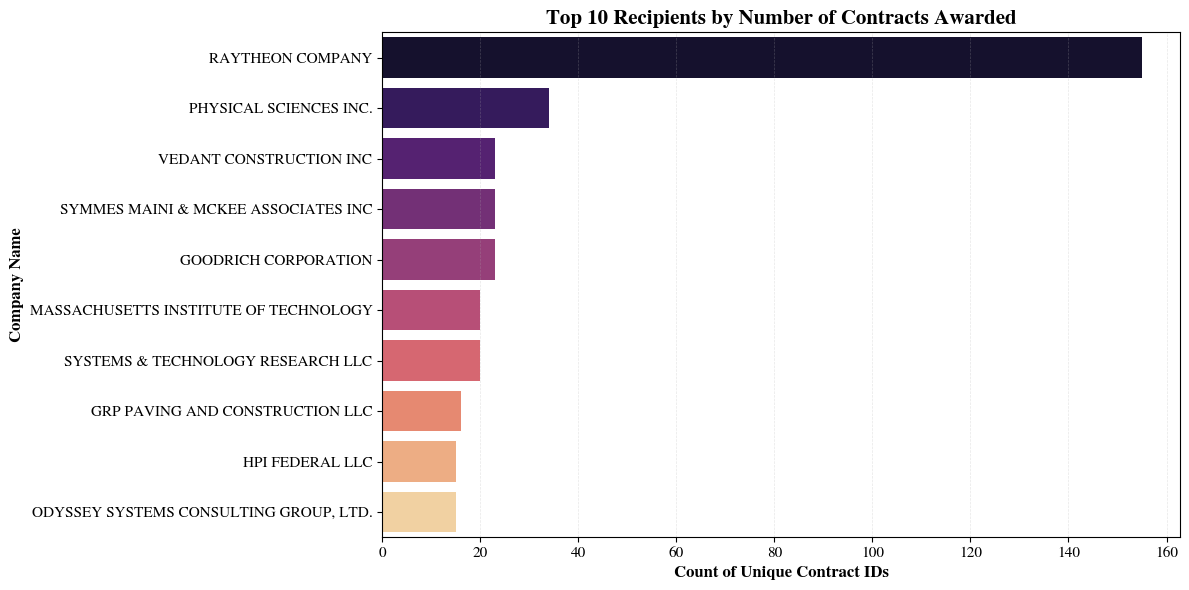

--- RECIPIENT SUMMARY (Ranked by Dollars) ---
                                        Total Dollars  Contract Count
recipient_name                                                       
MASSACHUSETTS INSTITUTE OF TECHNOLOGY    1.113084e+10              20
RAYTHEON COMPANY                         6.643974e+09             155
THE MITRE CORPORATION                    4.607697e+09              13
ODYSSEY SYSTEMS CONSULTING GROUP, LTD.   1.366066e+09              15
OASIS SYSTEMS, LLC                       7.479541e+08               4
SUMARIA SYSTEMS, LLC                     6.438873e+08              11
GOODRICH CORPORATION                     6.163534e+08              23
SYSTEMS & TECHNOLOGY RESEARCH LLC        2.697665e+08              20
BOOZ ALLEN HAMILTON INC                  1.436477e+08               6
RTX BBN TECHNOLOGIES, INC.               1.080726e+08               8


In [26]:
# --- NEW ANALYSIS: CONTRACT COUNT VS DOLLARS ---
# 1. Group by recipient and count how many unique Award IDs they have
contract_counts = df.groupby('recipient_name')['award_id_piid'].nunique().sort_values(ascending=False)

# 2. Group by recipient and sum the money
recipient_dollars = df.groupby('recipient_name')['total_obligated_amount'].sum().sort_values(ascending=False)

# --- VISUALIZATION: Number of Awards ---
plt.figure(figsize=(12, 6))
sns.barplot(x=contract_counts.head(10).values, 
            y=contract_counts.head(10).index, 
            palette="magma")

plt.title('Top 10 Recipients by Number of Contracts Awarded', fontsize=15)
plt.xlabel('Count of Unique Contract IDs', fontsize=12)
plt.ylabel('Company Name', fontsize=12)
plt.tight_layout()
plt.show()

# --- THE COMPARISON TABLE ---
# Let's combine both views to see who has many small contracts vs one giant one
comparison = pd.DataFrame({
    'Total Dollars': recipient_dollars,
    'Contract Count': contract_counts
}).sort_values(by='Total Dollars', ascending=False)

print("--- RECIPIENT SUMMARY (Ranked by Dollars) ---")
print(comparison.head(10))

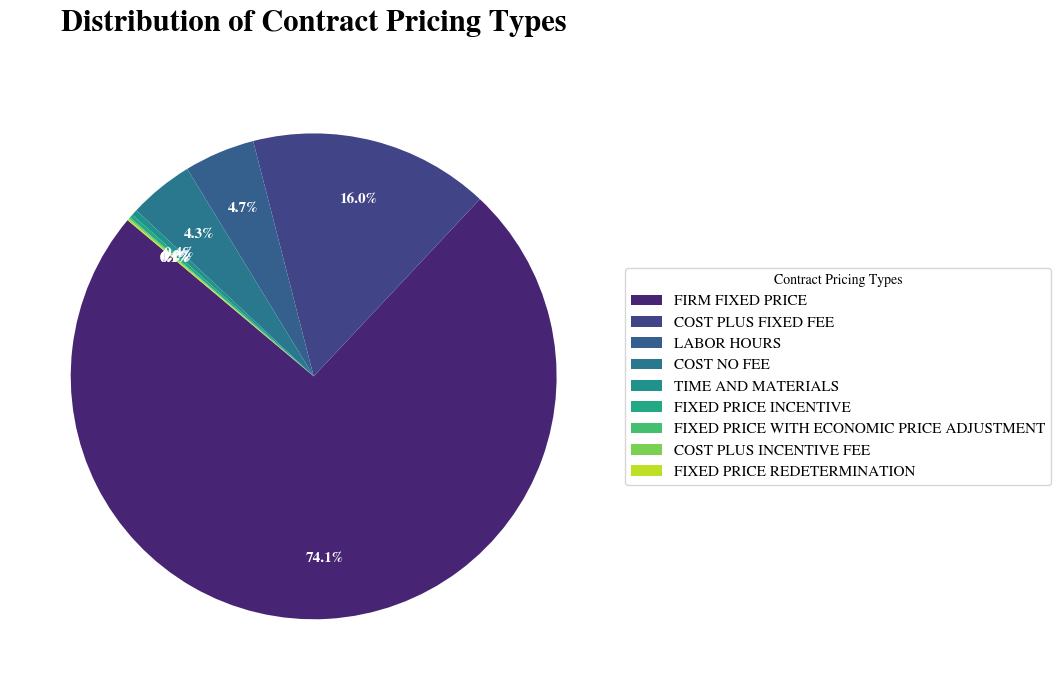

In [27]:
# --- ANALYSIS 2: CONTRACT PRICING BREAKDOWN (Styled) ---

# 1. Prepare the data
pricing_counts = df['type_of_contract_pricing'].value_counts()

# 2. Create the Figure
# We make it slightly wider (11 instead of 8) to fit the Legend on the right
plt.figure(figsize=(11, 7))

# 3. Create the Pie
# We set 'labels=None' to prevent the overlapping text on the chart
wedges, texts, autotexts = plt.pie(
    pricing_counts, 
    labels=None,                 # Removes labels from the slices
    autopct='%1.1f%%',           # Adds percentages inside
    startangle=140, 
    pctdistance=0.75,            # Moves % numbers closer to center for cleanliness
    colors=sns.color_palette("viridis", len(pricing_counts))
)

# 4. Style the percentages inside the slices
# This makes them white and bold so they pop against the colors
plt.setp(autotexts, size=11, weight="bold", color="white")

# 5. Add the Key (Legend) to the right
# bbox_to_anchor ensures it doesn't touch the circle
plt.legend(
    wedges, 
    pricing_counts.index, 
    title="Contract Pricing Types", 
    loc="center left", 
    bbox_to_anchor=(1, 0, 0.5, 1), # x, y, width, height
    frameon=True
)

# 6. Title with the "Big" font size requirement
plt.title('Distribution of Contract Pricing Types', pad=30)
plt.ylabel('') 

# Use tight_layout to make sure the legend isn't cut off
plt.tight_layout()
plt.show()

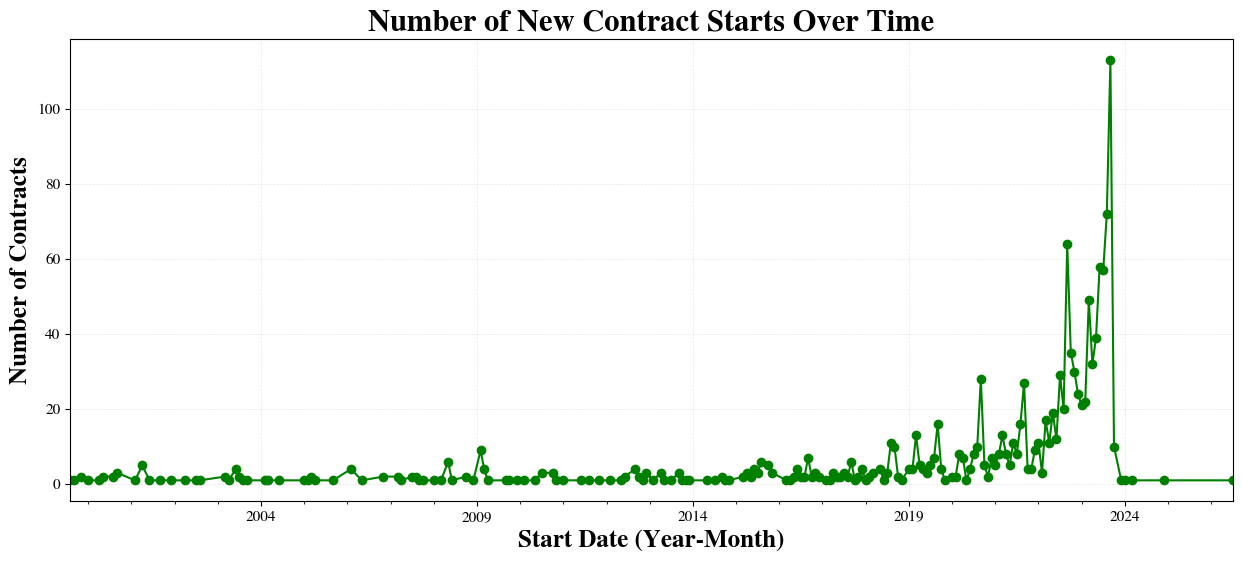

In [28]:
# --- ANALYSIS 3: WHEN CONTRACTS STARTED ---
# We group by Year and Month to see trends
df['start_month_year'] = df['period_of_performance_start_date'].dt.to_period('M')
time_trends = df.groupby('start_month_year').size()

# --- VISUALIZATION 3: Timeline of New Starts ---
plt.figure(figsize=(15, 6))
time_trends.plot(kind='line', marker='o', color='green')
plt.title('Number of New Contract Starts Over Time')
plt.xlabel('Start Date (Year-Month)')
plt.ylabel('Number of Contracts')
plt.grid(True, alpha=0.3)
plt.show()

In [29]:
# --- FINAL SUMMARY ---
print("\n--- DATASET SUMMARY ---")
print(f"Total Transactions: {len(df)}")
print(f"Unique Recipients: {df['recipient_name'].nunique()}")
print(f"Total Money Analyzed: ${df['total_obligated_amount'].sum():,.2f}")


--- DATASET SUMMARY ---
Total Transactions: 1275
Unique Recipients: 458
Total Money Analyzed: $28,476,373,348.14
